# PRCP - 1007 LIVER PATIENT PREDICTION

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Data collection

In [2]:
# read the files using pandas dataframe
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",names=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Target'], header = None)
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [3]:
df.Gender.value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [4]:
df.Target.value_counts()

1    416
2    167
Name: Target, dtype: int64

In [5]:
df.info() # checking of null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
df.describe() #statistial results on each numerical columns

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
df.isnull().sum() #checking of null values

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

In [8]:
df[df['Albumin_and_Globulin_Ratio'].isnull()] 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [9]:
df['Albumin_and_Globulin_Ratio'].median()
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median()) #removing the null rows using median values

In [10]:
df.loc[312]

Age                             27
Gender                        Male
Total_Bilirubin                1.3
Direct_Bilirubin               0.6
Alkaline_Phosphotase           106
Alamine_Aminotransferase        25
Aspartate_Aminotransferase      54
Total_Protiens                 8.5
Albumin                        4.8
Albumin_and_Globulin_Ratio    0.93
Target                           2
Name: 312, dtype: object

# Exploratory data analysis

## i) GENDER

In [11]:
# grouping of Gender columns into target column
distribution = df['Target'].value_counts().reset_index()
distribution.columns = ['Target','Counts']
distribution

,Target,Counts
0,1,416
1,2,167


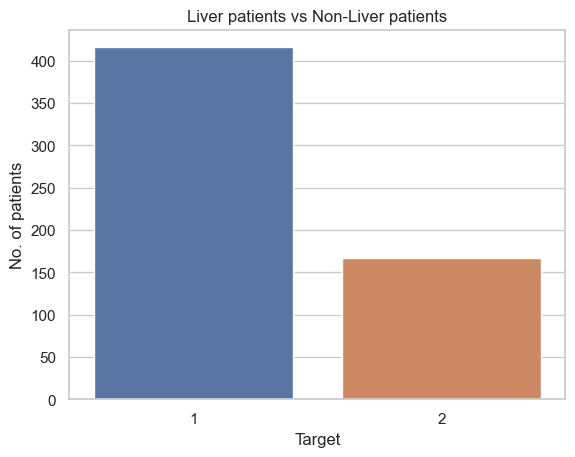

In [12]:
sns.set(style="whitegrid")
sns.barplot(x='Target',y='Counts', data = distribution)

plt.title("Liver patients vs Non-Liver patients")
plt.xlabel("Target")
plt.ylabel("No. of patients")
plt.show()

### Create dataframe for Male and Female 

In [13]:
df_m = df[df['Gender']== 'Male']
df_f = df[df['Gender']== 'Female']
print("MALE::::")
print("Shape of Male Patients:::", df_m.shape)
display(df_m)

print("\nFEMALE::::")
print("Shape of Female Patients:::",df_f.shape)
display(df_f)


MALE::::
Shape of Male Patients::: (441, 11)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1



FEMALE::::
Shape of Female Patients::: (142, 11)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
13,74,Female,1.1,0.4,214,22,30,8.1,4.1,1.00,1
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...
547,50,Female,27.7,10.8,380,39,348,7.1,2.3,0.40,1
549,40,Female,2.1,1.0,768,74,141,7.8,4.9,1.60,1
564,38,Female,0.6,0.1,165,22,34,5.9,2.9,0.90,2
566,50,Female,1.0,0.3,191,22,31,7.8,4.0,1.00,2


### Male distribution on disease

In [14]:
df_m.Target.value_counts() # no. of people in male who got affected and not affected

1    324
2    117
Name: Target, dtype: int64

In [15]:
male_distribution = df_m['Target'].value_counts().reset_index()
male_distribution.columns = ['Target', 'Male_counts']
male_distribution

,Target,Male_counts
0,1,324
1,2,117


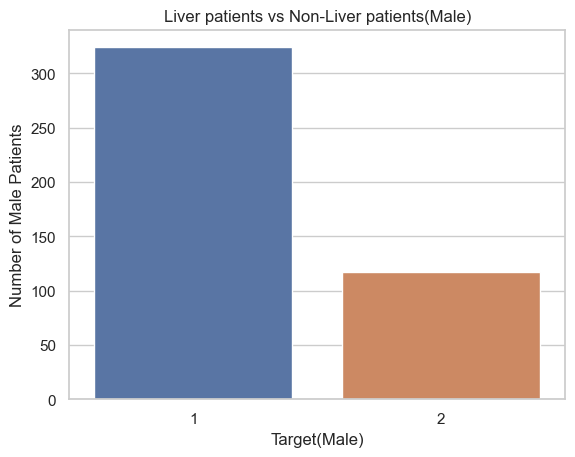

In [16]:
sns.barplot(x='Target', y='Male_counts', data=male_distribution)

plt.title('Liver patients vs Non-Liver patients(Male)')
plt.xlabel('Target(Male)')
plt.ylabel('Number of Male Patients')

plt.show()

## Female distribution on disease

In [17]:
df_f.Target.value_counts() # no. of people in female who got affected and not affected

1    92
2    50
Name: Target, dtype: int64

In [18]:
female_distribution = df_f['Target'].value_counts().reset_index()
female_distribution.columns = ['Target','Female_counts']
female_distribution

,Target,Female_counts
0,1,92
1,2,50


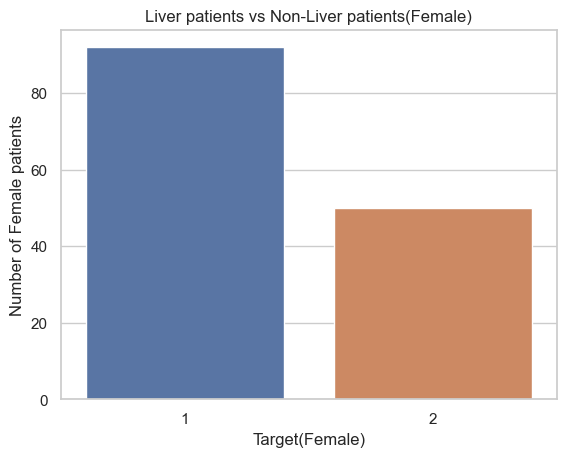

In [19]:
sns.barplot(x='Target',y='Female_counts',  data = female_distribution)

plt.title("Liver patients vs Non-Liver patients(Female)")
plt.xlabel("Target(Female)")
plt.ylabel("Number of Female patients")

plt.show()

### ii) AGE

### Distribution of overall age group

In [20]:
bins = [0, 20, 30, 40, 50, 60, 70, float('inf')]  # float('inf') is used to capture all ages above 70
labels = ['below 20', '20-30', '30-40', '40-50', '50-60', '60-70', 'above 70']
 
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False) # grouping based on age groups
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target,Age_Group
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,60-70
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,60-70
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,60-70
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,50-60
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,above 70
...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2,60-70
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1,40-50
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1,50-60
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1,30-40


In [21]:
age_distribution = df['Age_Group'].value_counts()

print("Number of persons by age:")
for age, count in age_distribution.items():
    print(f"Age {age}: {count} persons")

Number of persons by age:
Age 40-50: 128 persons
Age 30-40: 120 persons
Age 50-60: 97 persons
Age 60-70: 92 persons
Age 20-30: 67 persons
Age above 70: 41 persons
Age below 20: 38 persons


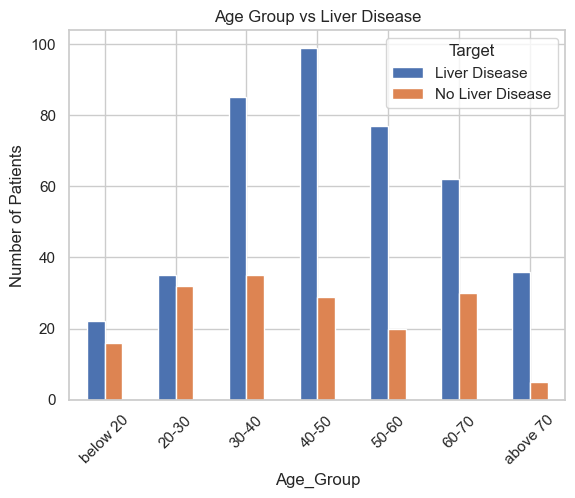

In [22]:
grouped_data = df.groupby(['Age_Group', 'Target']).size().unstack()

grouped_data.plot(kind='bar')

plt.xlabel('Age_Group')
plt.ylabel('Number of Patients')
plt.title('Age Group vs Liver Disease')
plt.legend(title='Target', labels=['Liver Disease', 'No Liver Disease'])
plt.xticks(rotation=45)
plt.show()

### Distibution of male age group

In [23]:
bins = [0, 20, 30, 40, 50, 60, 70, float('inf')]  # float('inf') is used to capture all ages above 70
labels = ['below 20', '20-30', '30-40', '40-50', '50-60', '60-70', 'above 70']

# Creating new column as 'Age Group' - male
df_m['Age_Group'] = pd.cut(df_m['Age'], bins=bins, labels=labels, right=False)
df_m

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target,Age_Group
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,60-70
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,60-70
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,50-60
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,above 70
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2,60-70
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1,40-50
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1,50-60
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1,30-40


In [24]:
age_distribution_m = df_m['Age_Group'].value_counts()

print("Number of Male persons by age:")
for age, count in age_distribution_m.items():
    print(f"Age {age}: {count} persons")

Number of Male persons by age:
Age 30-40: 95 persons
Age 40-50: 85 persons
Age 60-70: 80 persons
Age 50-60: 73 persons
Age 20-30: 46 persons
Age above 70: 33 persons
Age below 20: 29 persons


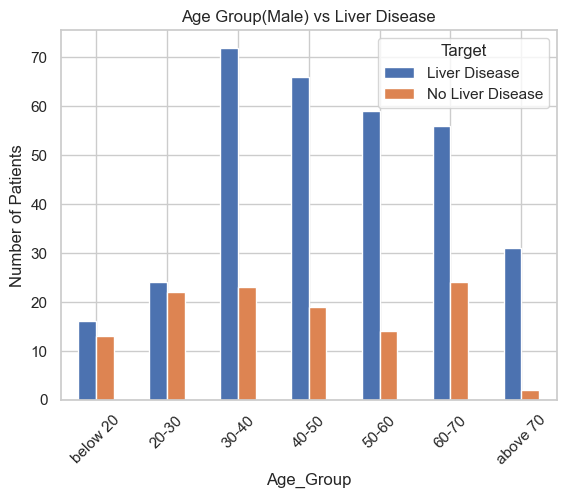

In [25]:
grouped_data = df_m.groupby(['Age_Group', 'Target']).size().unstack()

grouped_data.plot(kind='bar')

plt.xlabel('Age_Group')
plt.ylabel('Number of Patients')
plt.title('Age Group(Male) vs Liver Disease')
plt.legend(title='Target', labels=['Liver Disease', 'No Liver Disease'])
plt.xticks(rotation=45)
plt.show()

### Distribution of Female age group

In [26]:
bins = [0, 20, 30, 40, 50, 60, 70, float('inf')] 
labels = ['below 20', '20-30', '30-40', '40-50', '50-60', '60-70', 'above 70']
# Creating new column as 'Age Group' - female
df_f['Age_Group'] = pd.cut(df_f['Age'], bins=bins, labels=labels, right=False)
df_f

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target,Age_Group
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,60-70
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1,20-30
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1,20-30
13,74,Female,1.1,0.4,214,22,30,8.1,4.1,1.00,1,above 70
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...
547,50,Female,27.7,10.8,380,39,348,7.1,2.3,0.40,1,50-60
549,40,Female,2.1,1.0,768,74,141,7.8,4.9,1.60,1,40-50
564,38,Female,0.6,0.1,165,22,34,5.9,2.9,0.90,2,30-40
566,50,Female,1.0,0.3,191,22,31,7.8,4.0,1.00,2,50-60


In [27]:
age_distribution_f = df_f['Age_Group'].value_counts()

print("Number of Female persons by age:")
for age, count in age_distribution_f.items():
    print(f"Age {age}: {count} persons")

Number of Female persons by age:
Age 40-50: 43 persons
Age 30-40: 25 persons
Age 50-60: 24 persons
Age 20-30: 21 persons
Age 60-70: 12 persons
Age below 20: 9 persons
Age above 70: 8 persons


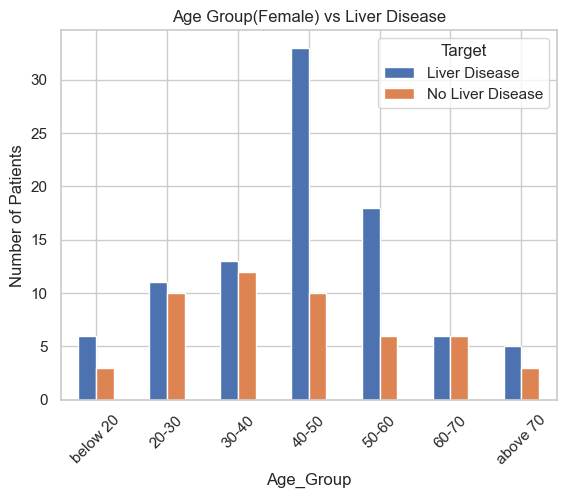

In [28]:
grouped_data = df_f.groupby(['Age_Group', 'Target']).size().unstack()

grouped_data.plot(kind='bar')

plt.xlabel('Age_Group')
plt.ylabel('Number of Patients')
plt.title('Age Group(Female) vs Liver Disease')
plt.legend(title='Target', labels=['Liver Disease', 'No Liver Disease'])
plt.xticks(rotation=45)
plt.show()

# Data Pre-processing

<Axes: >

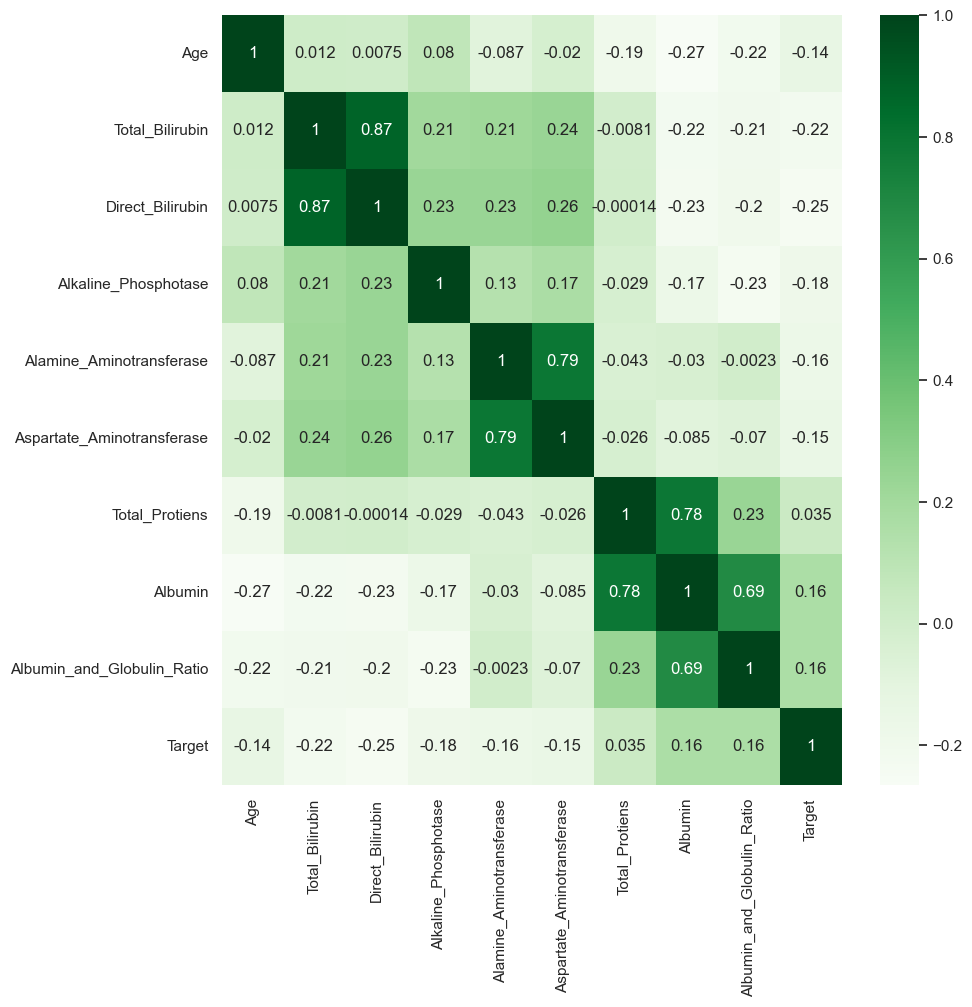

In [29]:
plt.figure(figsize=(10,10)) # checking of similar columns using correlation technique
sns.heatmap(df.corr(), annot=True,cmap ='Greens')

In [30]:
#dropping of similar columns to avoid over fitting
df.drop('Total_Bilirubin', axis=1, inplace= True)
df.drop('Alamine_Aminotransferase', axis=1, inplace= True)
df.drop('Total_Protiens', axis=1, inplace= True)
df.drop('Albumin', axis=1, inplace= True)

In [31]:
df.head()

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Albumin_and_Globulin_Ratio,Target,Age_Group
0,65,Female,0.1,187,18,0.90,1,60-70
1,62,Male,5.5,699,100,0.74,1,60-70
2,62,Male,4.1,490,68,0.89,1,60-70
3,58,Male,0.4,182,20,1.00,1,50-60
4,72,Male,2.0,195,59,0.40,1,above 70


In [32]:
df.drop('Age_Group',axis=1,inplace=True)

In [33]:
df.head()

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Albumin_and_Globulin_Ratio,Target
0,65,Female,0.1,187,18,0.90,1
1,62,Male,5.5,699,100,0.74,1
2,62,Male,4.1,490,68,0.89,1
3,58,Male,0.4,182,20,1.00,1
4,72,Male,2.0,195,59,0.40,1


<Axes: >

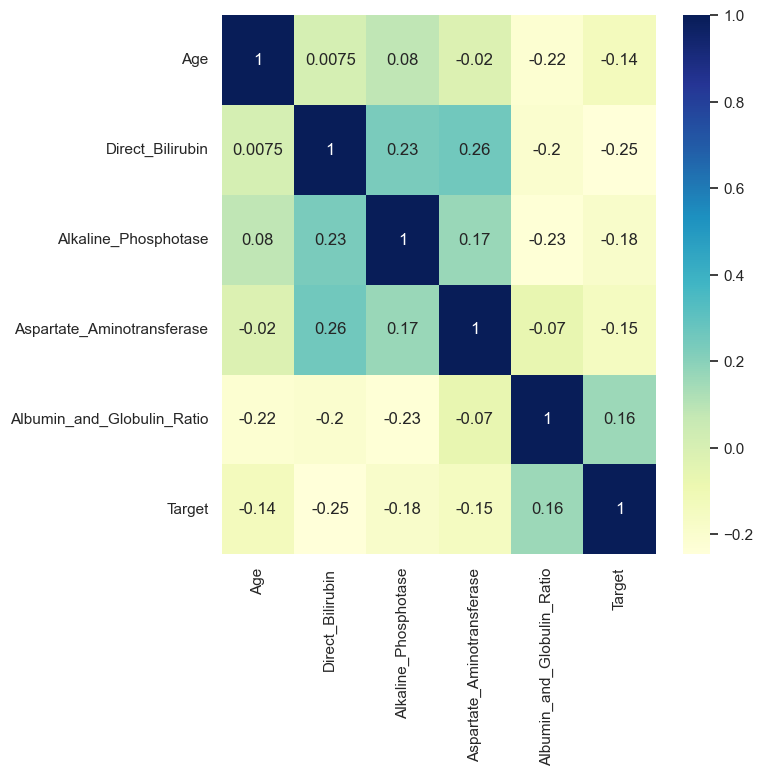

In [34]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")

In [35]:
# converting catergoical column into numerical column
df2=pd.get_dummies(df['Gender'])
df2.head()

,Female,Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [36]:
df=pd.concat([df,df2], axis=1)
df.head()

,Age,Gender,Direct_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Albumin_and_Globulin_Ratio,Target,Female,Male
0,65,Female,0.1,187,18,0.90,1,1,0
1,62,Male,5.5,699,100,0.74,1,0,1
2,62,Male,4.1,490,68,0.89,1,0,1
3,58,Male,0.4,182,20,1.00,1,0,1
4,72,Male,2.0,195,59,0.40,1,0,1


In [37]:
# Dropping redundant columns
df=df.drop(['Gender','Female'], axis=1)

,Age,Direct_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Albumin_and_Globulin_Ratio,Target,Male
0,65,0.1,187,18,0.90,1,0
1,62,5.5,699,100,0.74,1,1
2,62,4.1,490,68,0.89,1,1
3,58,0.4,182,20,1.00,1,1
4,72,2.0,195,59,0.40,1,1
...,...,...,...,...,...,...,...
578,60,0.1,500,34,0.37,2,1
579,40,0.1,98,31,1.10,1,1
580,52,0.2,245,49,1.00,1,1
581,31,0.5,184,32,1.00,1,1


In [38]:
df.columns

Index(['Age', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Aspartate_Aminotransferase', 'Albumin_and_Globulin_Ratio', 'Target',
       'Male'],
      dtype='object')

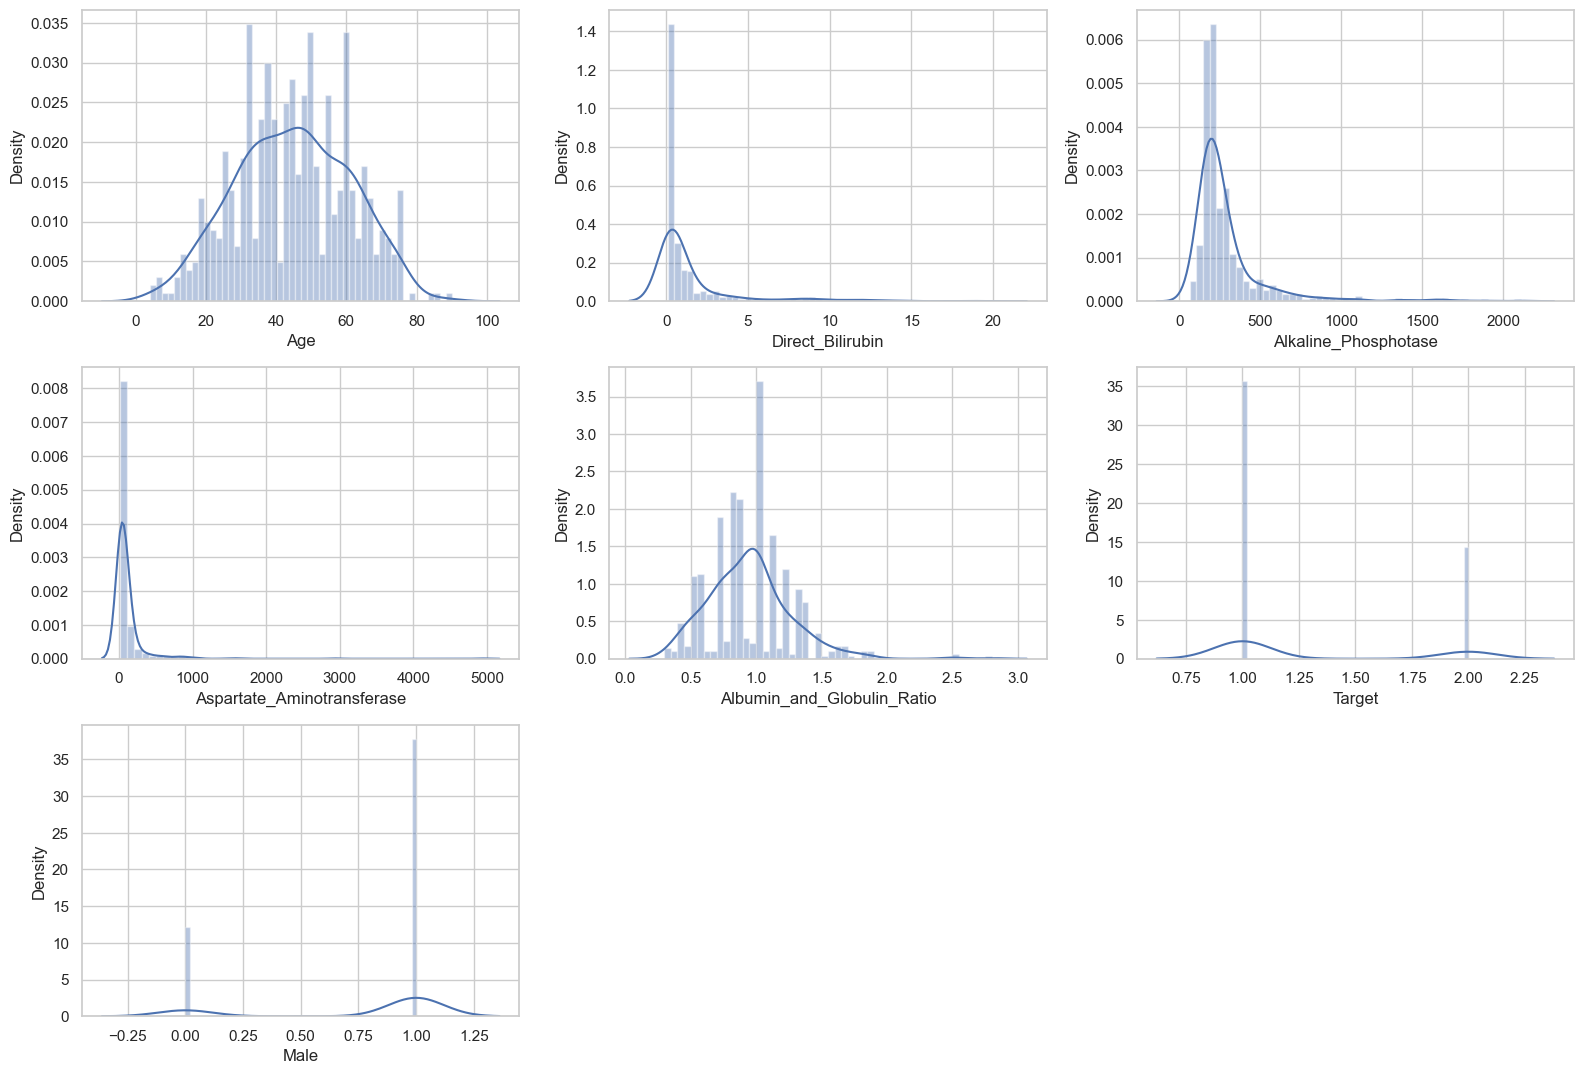

In [39]:
plt.figure(figsize=(16,14))
for i,col in enumerate(df.columns):
    plt.subplot(4,3,i+1)
    sns.distplot(a=df[col],bins=50,hist=True)
    plt.tight_layout()

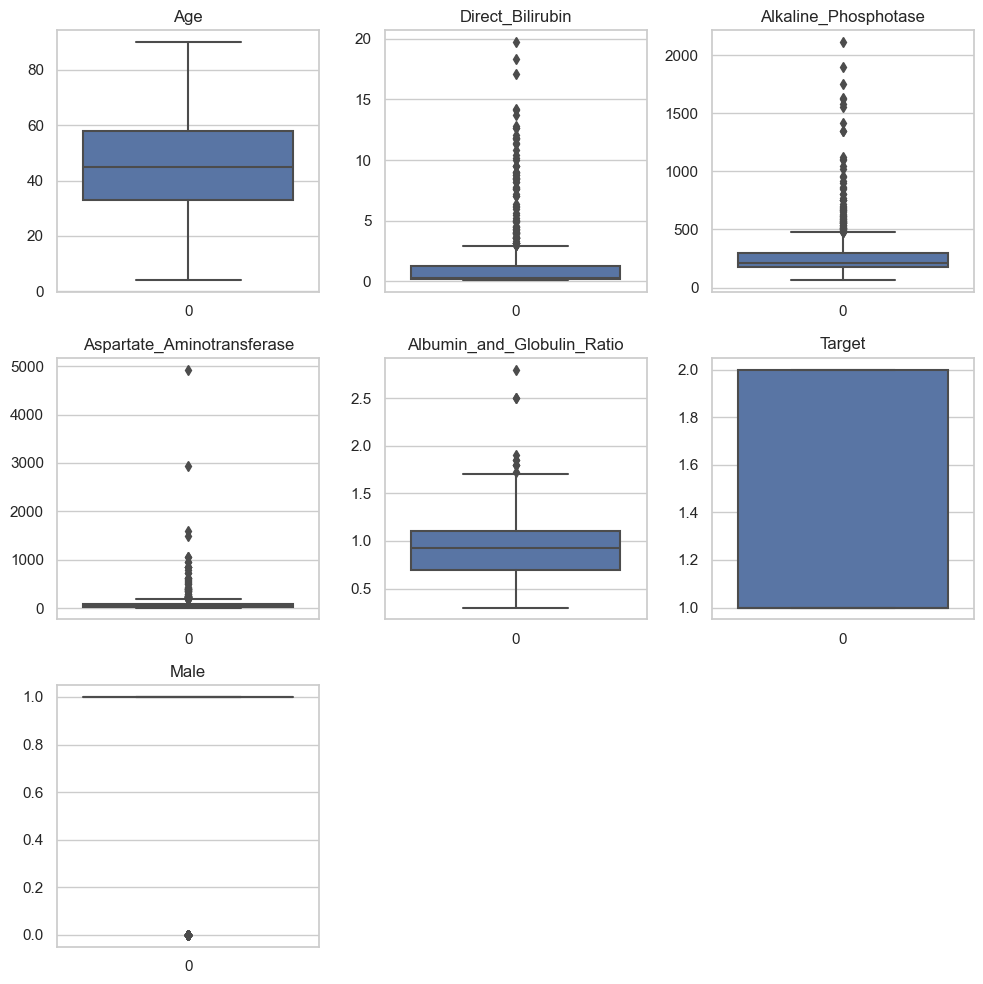

In [40]:
# checking of outliers
plt.figure(figsize=(10,10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

There is no outliers

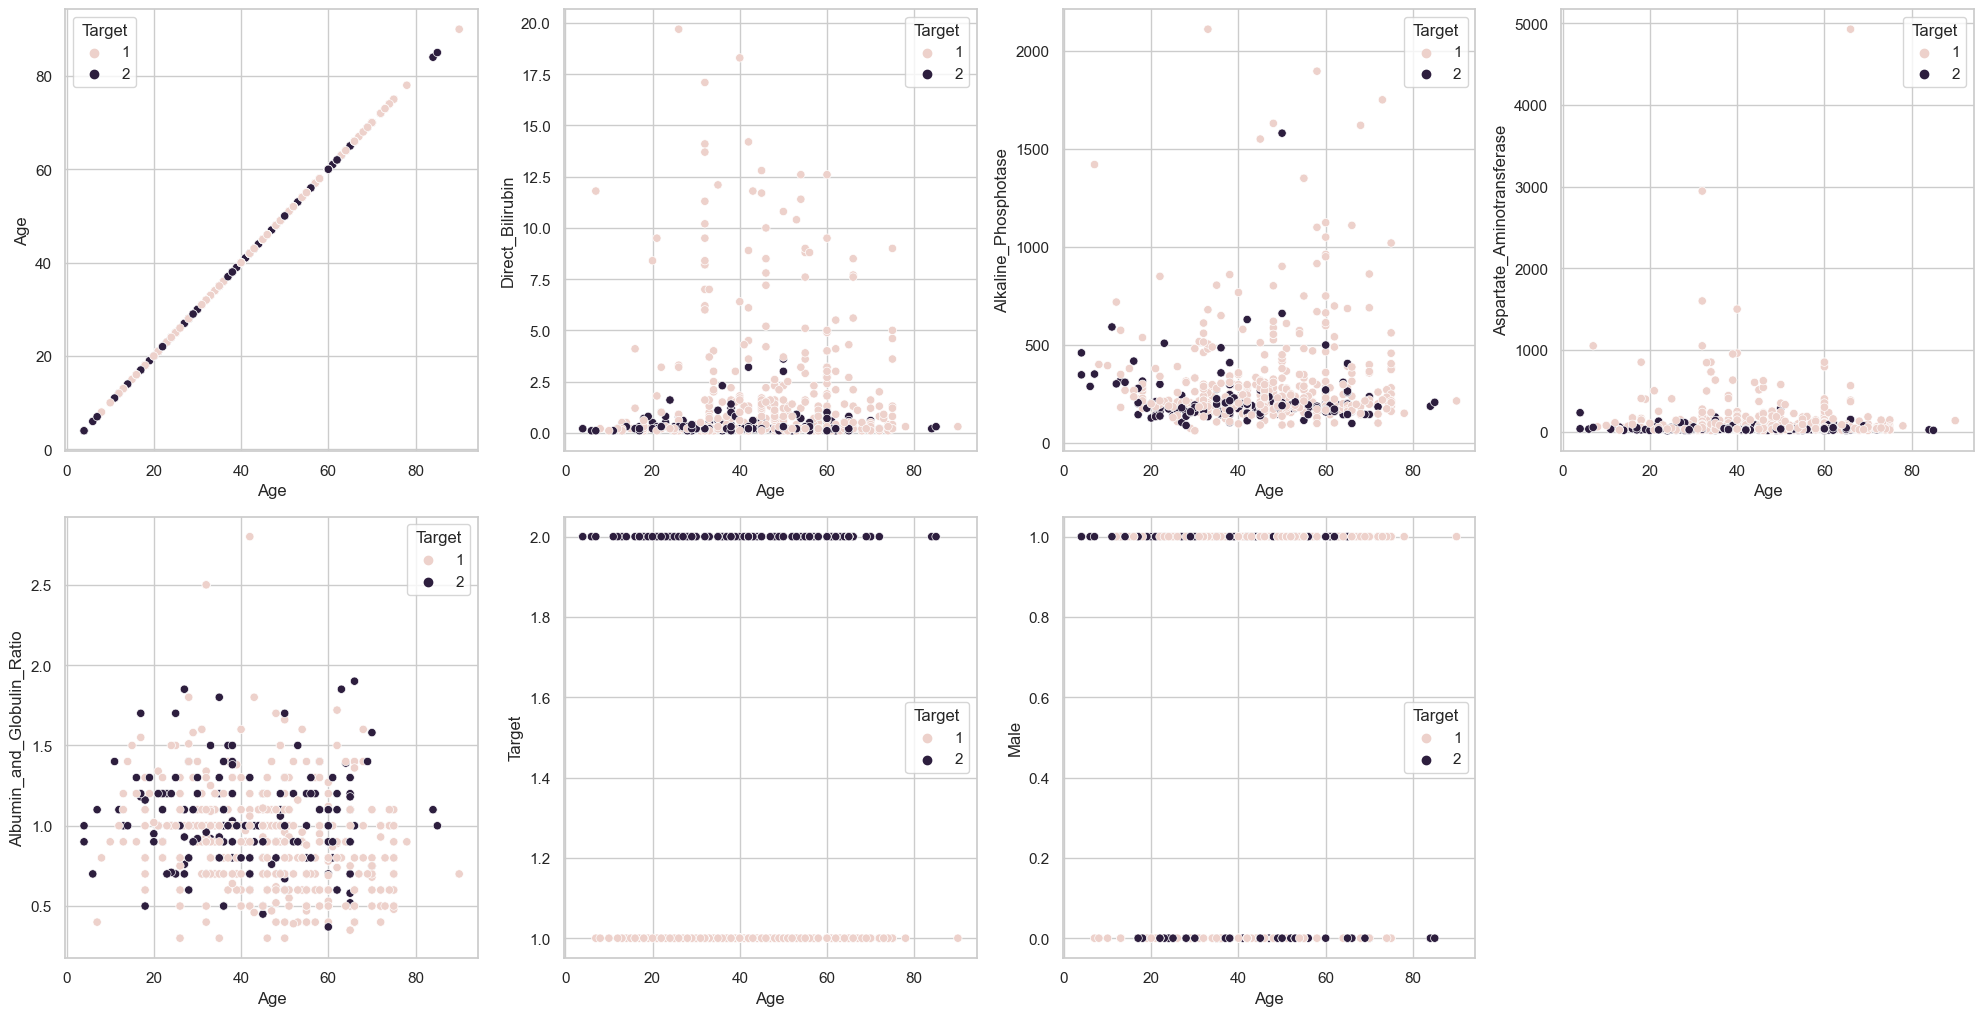

In [41]:
plt.figure(figsize = (20, 20))
plotnumber = 1
for column in df.columns:
    if plotnumber <= 8:
        ax = plt.subplot(4, 4, plotnumber)
        sns.scatterplot(x= 'Age',y= column, data=df, hue='Target')
        plt.tight_layout()

    plotnumber += 1

In [42]:
# We convert all values into 0s and 1s 

df['Target'] = df['Target'].apply(lambda x: 0 if x == 2 else x)

In [43]:
df.Target.value_counts()

1    416
0    167
Name: Target, dtype: int64

In [44]:
df.head()

,Age,Direct_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Albumin_and_Globulin_Ratio,Target,Male
0,65,0.1,187,18,0.90,1,0
1,62,5.5,699,100,0.74,1,1
2,62,4.1,490,68,0.89,1,1
3,58,0.4,182,20,1.00,1,1
4,72,2.0,195,59,0.40,1,1


In [83]:
df.to_csv("preprocessed.csv")

# Feature_Engineering

## Splitting of data into testing and training

In [85]:
x = df.drop(columns='Target',axis=1)
y = df['Target']

In [86]:
x

,Age,Direct_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Albumin_and_Globulin_Ratio,Male
0,65,0.1,187,18,0.90,0
1,62,5.5,699,100,0.74,1
2,62,4.1,490,68,0.89,1
3,58,0.4,182,20,1.00,1
4,72,2.0,195,59,0.40,1
...,...,...,...,...,...,...
578,60,0.1,500,34,0.37,1
579,40,0.1,98,31,1.10,1
580,52,0.2,245,49,1.00,1
581,31,0.5,184,32,1.00,1


In [87]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Target, Length: 583, dtype: int64

In [88]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(x)

In [89]:
# Save the scaler object to a file
joblib.dump(scaler, 'scaler_dt.pkl')

['scaler_dt.pkl']

In [50]:
X

array([[ 1.25209764, -0.49396398, -0.42671496, -0.31839333, -0.14752863,
        -1.76228085],
       [ 1.06663704,  1.43042334,  1.68262856, -0.03433257, -0.65032257,
         0.56744644],
       [ 1.06663704,  0.93150811,  0.82158795, -0.14518555, -0.17895325,
         0.56744644],
       ...,
       [ 0.44843504, -0.45832717, -0.18776589, -0.21100451,  0.16671759,
         0.56744644],
       [-0.84978917, -0.35141677, -0.43907439, -0.26989515,  0.16671759,
         0.56744644],
       [-0.41704777, -0.42269037, -0.30724042, -0.2976084 ,  1.73794867,
         0.56744644]])

In [51]:
X.shape

(583, 6)

In [52]:
y.value_counts()

1    416
0    167
Name: Target, dtype: int64

## apply SMOTE technique

In [53]:
# To reduce over fitting class imbalance is applied

from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X,y)

In [54]:
X_res.shape

(832, 6)

In [55]:
y_res.value_counts()

1    416
0    416
Name: Target, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split # 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)
print(X_res.shape, X_train.shape, X_test.shape)
print(y_res.shape,y_train.shape, y_test.shape)

(832, 6) (665, 6) (167, 6)
(832,) (665,) (167,)


## Model building 1 - Logistic regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [58]:
prediction = model.predict(X_test)
accuracy = accuracy_score(prediction, y_test)

In [59]:
accuracy

0.7365269461077845

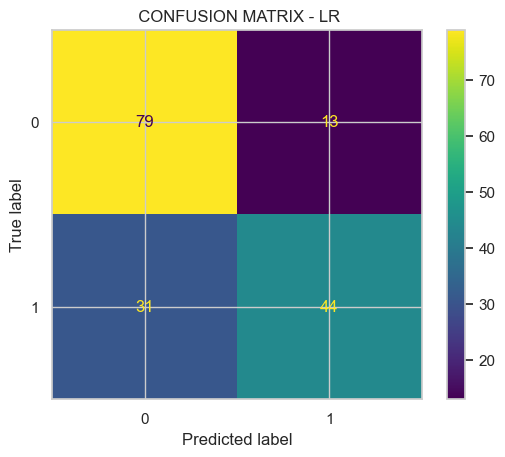

In [60]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix
from sklearn import metrics
cm = confusion_matrix(y_test,prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.title('                  CONFUSION MATRIX - LR                 ')
plt.show()

In [61]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, mean_squared_error, classification_report
print('______________Classification Report - Logistic regression________________')
print('')
print(classification_report(y_test,prediction))

# accuracy: (tp + tn) / (p + n)
LR_accuracy = accuracy_score(y_test,prediction)
print('Accuracy: %f' % LR_accuracy)

# precision: tp / (tp + fp)
LR_precision = precision_score(y_test,prediction,average='macro')
print('Precision: %f' % LR_precision)

# recall: tp / (tp + fn)
LR_recall = recall_score(y_test,prediction,average='macro')
print('Recall: %f' % LR_recall)

# f1: 2 tp / (2 tp + fp + fn)
# FMeasure = (2 * Precision * Recall) / (Precision + Recall)
LR_f1_score = f1_score(y_test,prediction,average='macro')
print('F1-Score: %f' % LR_f1_score)

______________Classification Report - Logistic regression________________

              precision    recall  f1-score   support

           0       0.72      0.86      0.78        92
           1       0.77      0.59      0.67        75

    accuracy                           0.74       167
   macro avg       0.75      0.72      0.72       167
weighted avg       0.74      0.74      0.73       167

Accuracy: 0.736527
Precision: 0.745056
Recall: 0.722681
F1-Score: 0.724422


## Model building 2 - Support vector machine

In [62]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_test,y_test)

SVC()

In [63]:
prediction = model.predict(X_test)
accuracy = accuracy_score(prediction,y_test)
accuracy

0.7664670658682635

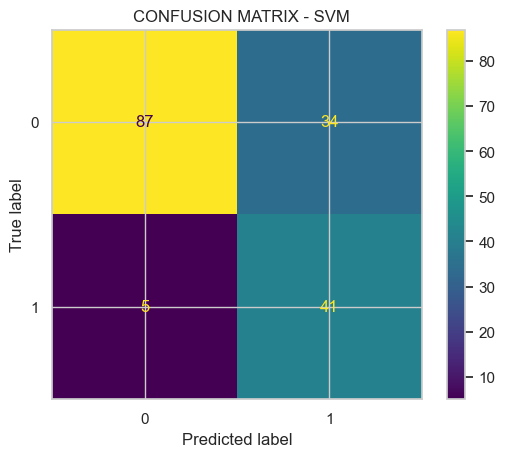

In [64]:
cm = confusion_matrix(prediction,y_test)
cm_display = metrics.ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.title("        CONFUSION MATRIX - SVM      ")
plt.show()

In [65]:
print("___________________Classification report - SVM__________________")
print(" ")
print(classification_report(prediction,y_test))

SVM_accuracy = accuracy_score(prediction,y_test)
print("Accuracy: %f"% SVM_accuracy)

SVM_precision = precision_score(prediction,y_test, average = 'macro')
print("Precision : %f" % SVM_precision)

SVM_recall = recall_score(prediction,y_test, average = 'macro')
print("Recall : %f" % SVM_recall)

SVM_f1_score = f1_score(prediction,y_test, average = 'macro')
print("F1-score : %f" % SVM_f1_score)

___________________Classification report - SVM__________________
 
              precision    recall  f1-score   support

           0       0.95      0.72      0.82       121
           1       0.55      0.89      0.68        46

    accuracy                           0.77       167
   macro avg       0.75      0.81      0.75       167
weighted avg       0.84      0.77      0.78       167

Accuracy: 0.766467
Precision : 0.746159
Recall : 0.805156
F1-score : 0.747294


## Model building 3 - Random forest classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [67]:
prediction = model.predict(X_test)
accuracy = accuracy_score(prediction,y_test)
accuracy

0.7904191616766467

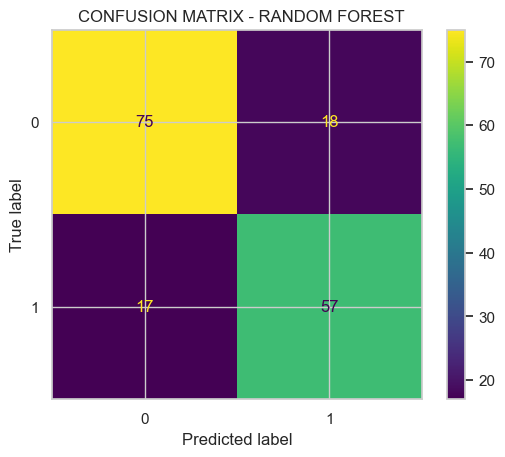

In [68]:
cm = confusion_matrix(prediction,y_test)
cm_display = metrics.ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.title("        CONFUSION MATRIX - RANDOM FOREST      ")
plt.show()

In [69]:
print('______________Classification Report - Random Forest classifier________________')
print('')
print(classification_report(prediction,y_test))

RF_accuracy = accuracy_score(y_test,prediction)
print('Accuracy: %f' % RF_accuracy)

RF_precision = precision_score(y_test,prediction,average='macro')
print('Precision: %f' % RF_precision)

RF_recall = recall_score(y_test,prediction,average='macro')
print('Recall: %f' % RF_recall)

RF_f1_score = f1_score(y_test,prediction,average='macro')
print('F1-Score: %f' % RF_f1_score)

______________Classification Report - Random Forest classifier________________

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        93
           1       0.76      0.77      0.77        74

    accuracy                           0.79       167
   macro avg       0.79      0.79      0.79       167
weighted avg       0.79      0.79      0.79       167

Accuracy: 0.790419
Precision: 0.788361
Recall: 0.787609
F1-Score: 0.787956


## Model building 4 - Decision tree

In [70]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [71]:
prediction = model.predict(X_test)
accuracy = accuracy_score(prediction, y_test)
accuracy

0.8982035928143712

In [80]:
import joblib
# Save the model to a file
joblib.dump(model, 'model_dt.pkl')

['model_dt.pkl']

In [81]:
# Load the model from the file
loaded_model = joblib.load('model_dt.pkl')

# Use the loaded model to make predictions
prediction = loaded_model.predict(X_test)
prediction

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [82]:
y_test

610    0
819    0
290    1
559    1
168    1
      ..
192    1
651    0
456    0
774    0
531    1
Name: Target, Length: 167, dtype: int64

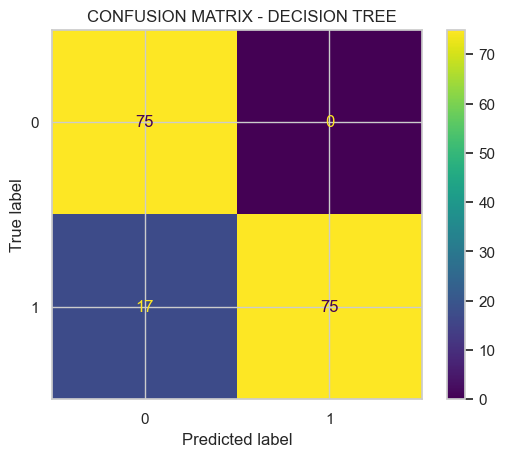

In [72]:
cm = confusion_matrix(prediction,y_test)
cm_display = metrics.ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.title("        CONFUSION MATRIX - DECISION TREE      ")
plt.show()

In [73]:
print("___________________Classification report - Decision Tree__________________")
print(" ")
print(classification_report(prediction,y_test))

DT_accuracy = accuracy_score(prediction,y_test)
print("Accuracy: %f"% DT_accuracy)

DT_precision = precision_score(prediction,y_test, average = 'macro')
print("Precision : %f" % DT_precision)

DT_recall = recall_score(prediction,y_test, average = 'macro')
print("Recall : %f" % DT_recall)

DT_f1_score = f1_score(prediction,y_test, average = 'macro')
print("F1-score : %f" % DT_f1_score)

___________________Classification report - Decision Tree__________________
 
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        75
           1       1.00      0.82      0.90        92

    accuracy                           0.90       167
   macro avg       0.91      0.91      0.90       167
weighted avg       0.92      0.90      0.90       167

Accuracy: 0.898204
Precision : 0.907609
Recall : 0.907609
F1-score : 0.898204


## Evaluation and performance metrics

In [74]:
import pandas as pd

result={'LOGISTIC REGRESSION':(LR_accuracy,LR_precision,LR_recall,LR_f1_score), 
        'SUPPORT VECTOR MACHINE': (SVM_accuracy,SVM_precision,SVM_recall,SVM_f1_score),
        'RANDOM FOREST CLASSIFIER':(RF_accuracy,RF_precision,RF_recall,RF_f1_score),
        'DECISION TREE':(DT_accuracy,DT_precision,DT_recall,DT_f1_score),
        }

result=pd.DataFrame(result,index=['Accuracy','Precision','Recall','F1-score'])

In [75]:
result=result.round(decimals=4)
result

,LOGISTIC REGRESSION,SUPPORT VECTOR MACHINE,RANDOM FOREST CLASSIFIER,DECISION TREE
Accuracy,0.7365,0.7665,0.7904,0.8982
Precision,0.7451,0.7462,0.7884,0.9076
Recall,0.7227,0.8052,0.7876,0.9076
F1-score,0.7244,0.7473,0.7880,0.8982


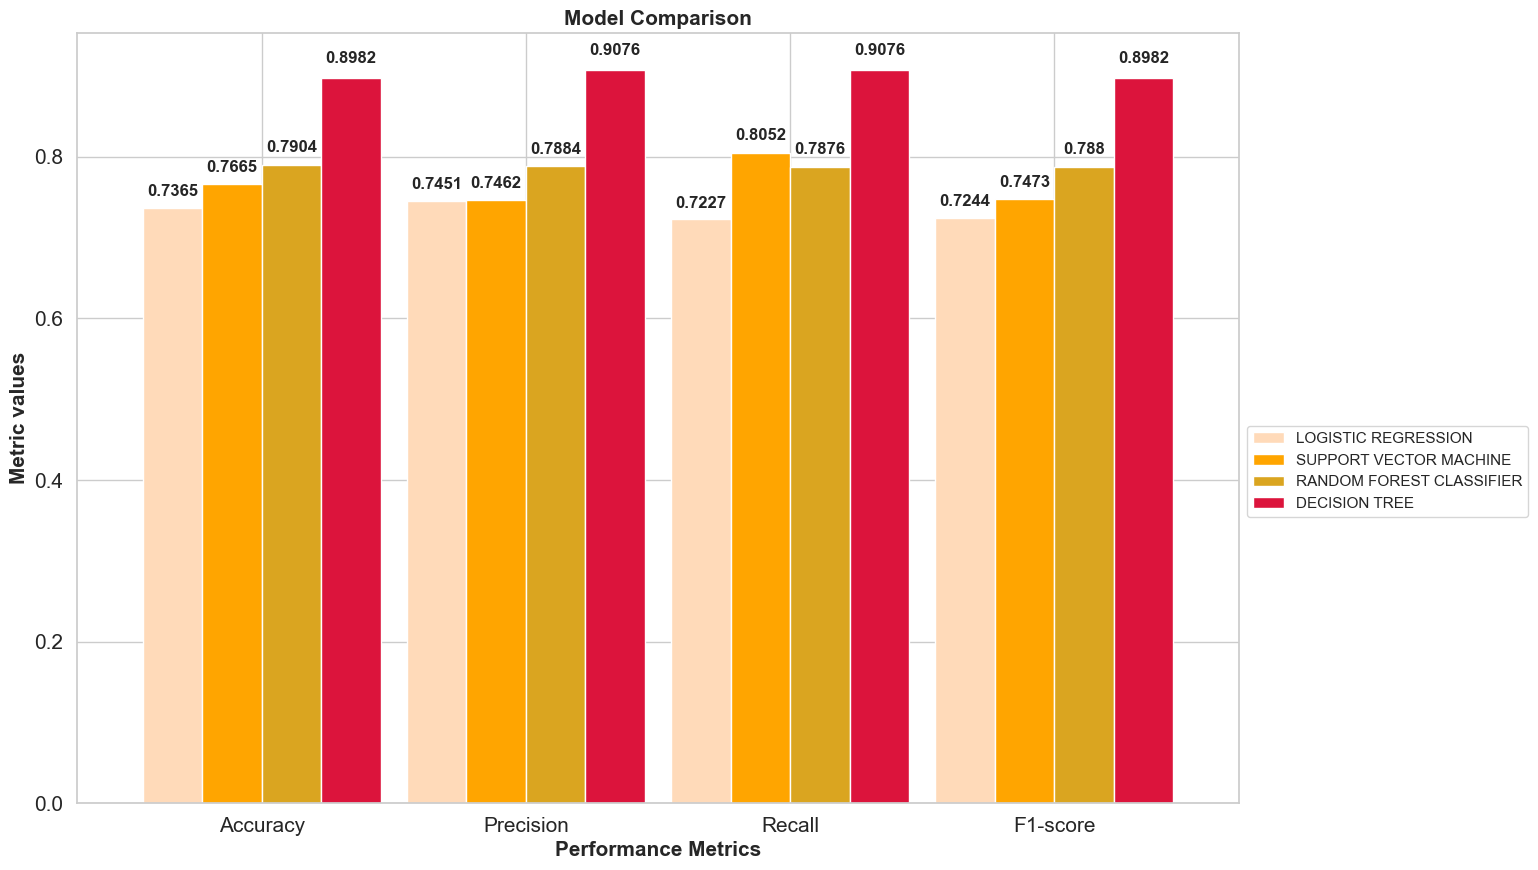

In [76]:
import matplotlib.pyplot as plt
colors_list=['peachpuff','orange','goldenrod','crimson']
ax = result.plot(kind='bar', figsize=(15,10), width=0.9, color=colors_list, edgecolor=None, fontsize=15)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center',fontweight='bold')

plt.title("Model Comparison",size=15,fontweight="bold")
plt.xlabel("Performance Metrics",size=15,fontweight="bold")
plt.ylabel("Metric values",size=15,fontweight="bold")
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor =(1, 0.5))

plt.show()

In [77]:
result.to_csv("final_result.csv")

# RESULTS::

Decision tree classifier performs well in all the metrics, this could be the better model for production

## Challenges: